# DataSet First Progress Report
### Zachary Boroughs
### DataSet 31 - Breast Cancer Expression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#Data Preprocessing
data = pd.read_csv('data11.csv')

data_math = data
pos_val = 0;
neg_val = 0;
for column in data_math:
    if data_math[column][0] == 'P':
        data_math[column][0] = 1
        pos_val += 1;
    else:
        data_math[column][0] = 0
        neg_val += 1;
print(pos_val, 'positive values and', neg_val, 'negative values')

row1 = data_math['Unnamed: 0']
data_math = data_math.drop(['Unnamed: 0'], axis=1)
data_math = data_math.astype(float)
data_math = data_math.transpose()
#First column is now our positive/negative binary value


30 positive values and 111 negative values


C:\Users\zdbor\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
corrMatrix = data_math.corr()
print(corrMatrix)
#This is our correlation matrix for the data, our first column is the positive/negative binary value


          0         1         2         3         4         5         6      \
0      1.000000  0.272908  0.094307 -0.024906 -0.019456 -0.064330 -0.066075   
1      0.272908  1.000000 -0.014407  0.009606  0.093868 -0.176109 -0.153446   
2      0.094307 -0.014407  1.000000 -0.072167 -0.491761 -0.419759 -0.390716   
3     -0.024906  0.009606 -0.072167  1.000000  0.253104  0.197648  0.073222   
4     -0.019456  0.093868 -0.491761  0.253104  1.000000  0.591833  0.291456   
5     -0.064330 -0.176109 -0.419759  0.197648  0.591833  1.000000  0.266546   
6     -0.066075 -0.153446 -0.390716  0.073222  0.291456  0.266546  1.000000   
7      0.062948 -0.012786 -0.575677  0.208253  0.655583  0.546902  0.358197   
8     -0.074013 -0.071194 -0.160391  0.071295  0.384715  0.305745  0.031545   
9     -0.040641 -0.251349 -0.058317  0.148414  0.038339  0.026105  0.340389   
10     0.010951 -0.071621 -0.424519  0.264452  0.564771  0.490199  0.313028   
11    -0.038787  0.120273  0.072613  0.184762  0.149

In [132]:
corrMatrix.sort_values([0], ascending=False).head(10)
#These are our most positively correlated genes (by row and ignoring first as that is the binary column itself)

NameError: name 'corrMatrix' is not defined

In [4]:
corrMatrix.sort_values([0], ascending=True).head(10)
#These are our most negatively correlated genes

,0,1,2,3,4,5,6,7,8,9,...,13290,13291,13292,13293,13294,13295,13296,13297,13298,13299
10734,-0.437755,0.031368,-0.107332,-0.006789,0.051804,0.056688,0.087089,0.060633,0.070416,-0.151627,...,0.201230,-0.005428,0.092858,-0.004353,-0.027009,0.332134,-0.128175,0.034186,0.024090,0.093940
11903,-0.424280,-0.265111,0.034478,-0.108621,-0.091455,-0.028539,0.043931,-0.232973,-0.011241,0.003372,...,0.097770,0.044325,0.018067,-0.137096,0.154122,0.315351,0.018884,0.022821,-0.001075,0.008072
11295,-0.354448,-0.173667,-0.281464,0.118814,0.117536,0.182166,0.271894,0.136114,0.051884,0.082914,...,-0.046372,0.215136,0.155461,-0.020710,-0.120519,0.182937,-0.273819,0.092272,0.210126,0.297797
1310,-0.343432,0.163121,-0.033844,-0.086141,-0.165869,-0.191411,0.043620,-0.084776,-0.224204,-0.248270,...,-0.024587,-0.151915,-0.056094,-0.280863,-0.084124,0.193642,-0.082205,0.093368,-0.079211,0.036077
8745,-0.339187,-0.408495,0.110367,0.129710,-0.004611,0.204410,-0.046982,-0.100279,0.052694,0.115673,...,0.066431,0.135084,-0.219727,-0.049109,0.217112,0.074269,-0.057020,-0.009176,0.247027,-0.104873


GRB7
STARD3
PGAP3
PSMD3
MIR6884///MED24


Text(0, 0.5, 'Frequency')

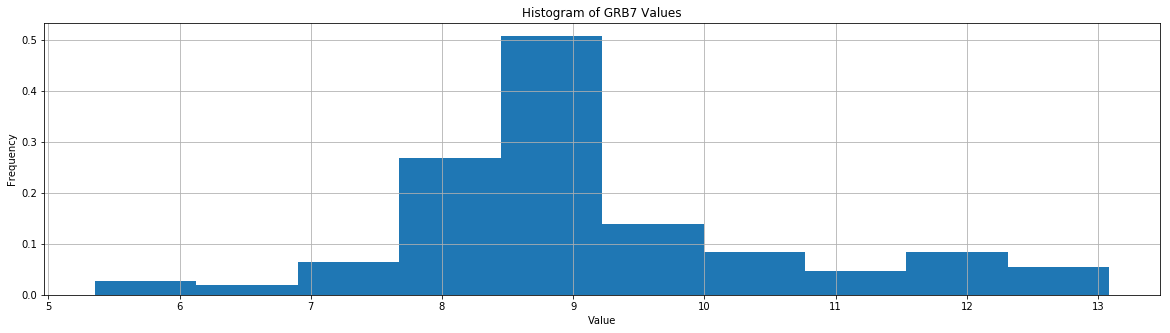

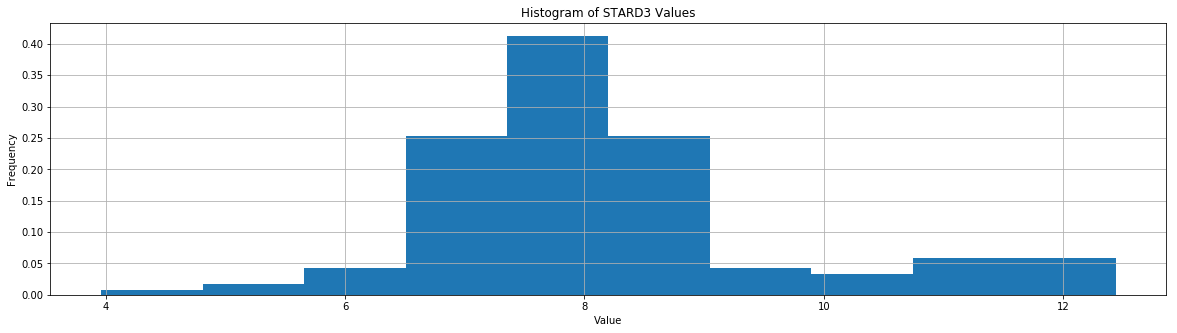

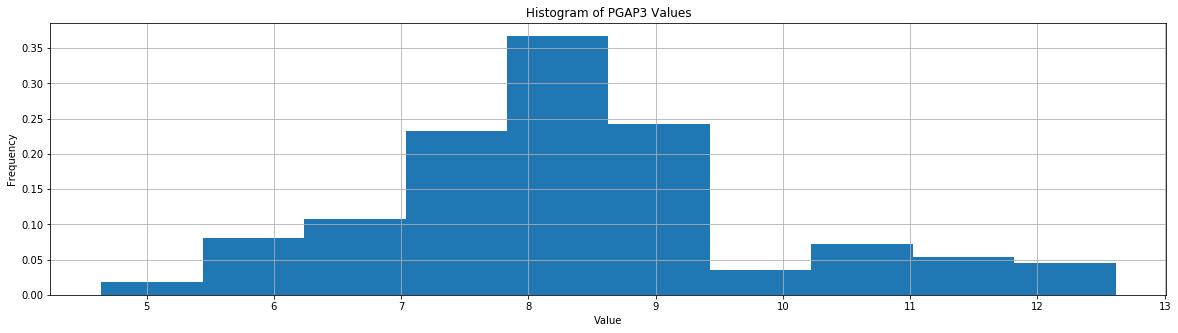

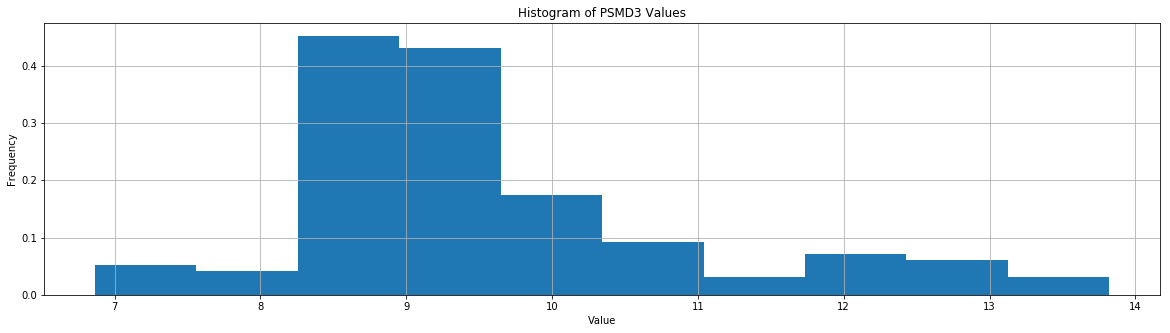

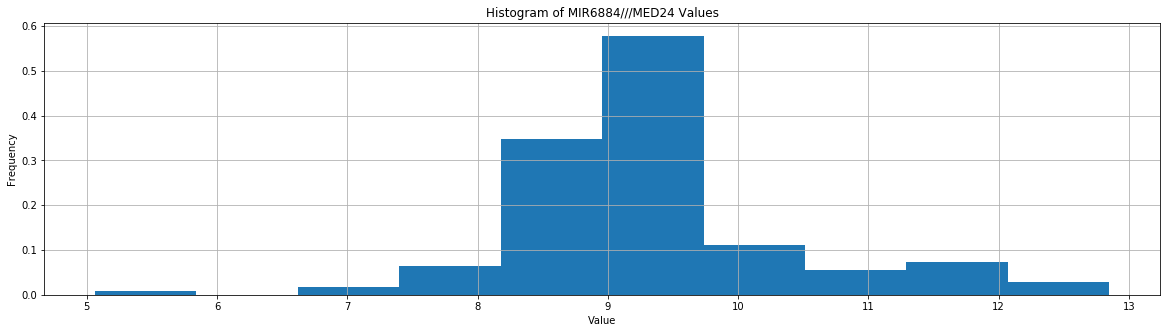

In [129]:
#So, let's take a closer look at some of these genes

print(data['Unnamed: 0'][7441])
#"Growth factor receptor-bound protein 7 (GRB7) gene is located adjacent to the 
#HER2 gene on the 17q12-21 amplicon, is often coamplified with HER2 in a subset of 
#breast cancers, and has been implicated in resistance to anti-HER2 and antiestrogen therapy".
#From 'GRB7 Expression and Correlation With HER2 Amplification in Invasive Breast Carcinoma'
#HER2 is a protein of which higher levels commonly correlate with breast cancer, so this correlation
#with GRB7 makes sense

print(data['Unnamed: 0'][1752])
#"These results provide evidence that StARD3 overexpression results in increased cholesterol 
#biosynthesis and Src kinase activity in breast cancer cells and suggest that elevated StARD3 
#expression may contribute to breast cancer aggressiveness by increasing membrane cholesterol 
#and enhancing oncogenic signaling."
#From 'Elevated levels of StAR-related lipid transfer protein 3 alter cholesterol balance and 
#adhesiveness of breast cancer cells: potential mechanisms contributing to progression of 
#HER2-positive breast cancers'
#Again, we see that elevated levels of STARD3 do have a recognized correlation with
#breast cancer onset

print(data['Unnamed: 0'][13083])
#Although less documented, a study published by The Human Protein Atlas showed that 11/11 patients
#with breast cancer tested showed high/medium expression of PGAP3

print(data['Unnamed: 0'][633])
#"A brief report revealed that PSMD3 expression was significantly associated with HER2 
#and detected in 23% of HER2+ tumors"
#From 'Proteasome 26S Subunit, non-ATPase 3 (PSMD3) Regulates Breast Cancer by Stabilizing HER2 from Degradation'
#Again, we see a correlation between PSMD3 and HER2 protein values, supporting the relationship we saw
#with GRB7

print(data['Unnamed: 0'][8247])
#Appears to be more commonly associated with prostate cancer, we see a pretty severe drop between
#this gene and prior correlations so may be more associated with cancer growth in general as
#opposed to breast cancer specifically


plt.figure(figsize=(20,5))
axes = data_math[7441].hist(density=True)
plt.title('Histogram of GRB7 Values')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.figure(figsize=(20,5))
axes = data_math[1752].hist(density=True)
plt.title('Histogram of STARD3 Values')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.figure(figsize=(20,5))
axes = data_math[13083].hist(density=True)
plt.title('Histogram of PGAP3 Values')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.figure(figsize=(20,5))
axes = data_math[633].hist(density=True)
plt.title('Histogram of PSMD3 Values')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.figure(figsize=(20,5))
axes = data_math[8247].hist(density=True)
plt.title('Histogram of MIR6884///MED24 Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
#They all look somewhat normally distributed with the exception of PSMD3


ASB13
NUDT6
HCFC2
SERPINA3
SEC22B


Text(0, 0.5, 'Frequency')

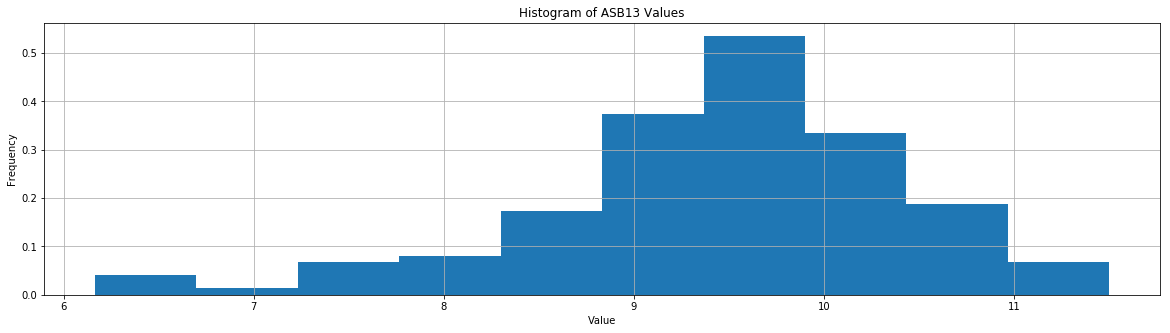

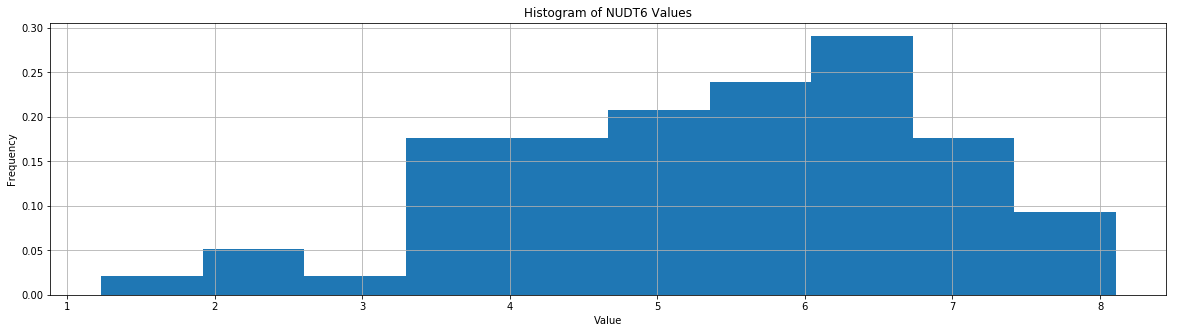

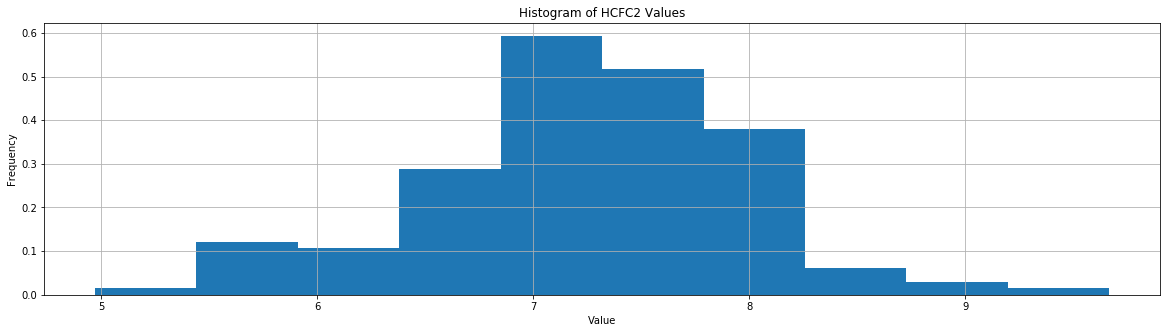

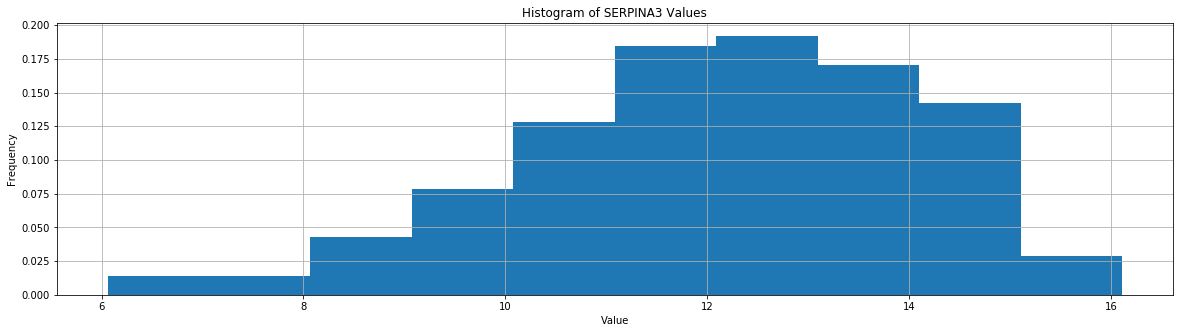

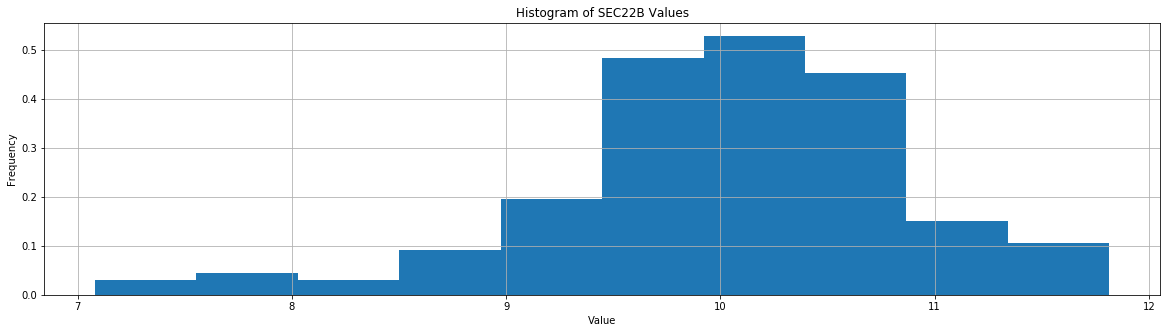

In [130]:
#Now let's take a look at the negatively correlated badboys
print(data['Unnamed: 0'][10734])
#"Clinical data analysis reveals that ASB13 expression is positively correlated 
#with improved overall survival in breast cancer patients. These findings establish 
#ASB13 as a suppressor of breast cancer metastasis by promoting degradation of 
#SNAI2 and relieving its transcriptional repression of YAP."
#From 'ASB13 inhibits breast cancer metastasis through promoting SNAI2 degradation 
#and relieving its transcriptional repression of YAP'
#So here we see that ASB13 is strongly correlated with survival in breast cancer patients
#through surpressing the metastisis of the cancer. As such, this negative correlation
#makes sense.

print(data['Unnamed: 0'][11903])
#Seems to be associated with proliferation of colorectal cancers, strong negative correlation
#with regards to breast cancer could be worth investigating.

print(data['Unnamed: 0'][11295])
#From 'HCF-2 inhibits cell proliferation and activates differentiation-gene expression programs'
#Although cancer is not mentioned in the abstract, elevated HCF-2 levels inhibiting cell
#proliferation could be a reason being this negative correlation

print(data['Unnamed: 0'][1310])
#Most research appears to correlate upregulation of SERPINA3 with increased cancer spread,
#although negative correlation is not as strong could be worth investigating

print(data['Unnamed: 0'][8745])
#Mutation in SEC22B have been strongly correlated with a number of cancers (especially breast cancer).
#Specifically, the SEC22B-NOTCH2 is commonly seen in aggressive breast cancers. 
#Interesting as elevated levels of SEC22B seem to be correlated with lower cancer expression,
#could be that a higher number of pure SEC22B means that not many mutations are present, could
#be worth investigating.


plt.figure(figsize=(20,5))
axes = data_math[10734].hist(density=True)
plt.title('Histogram of ASB13 Values')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.figure(figsize=(20,5))
axes = data_math[11903].hist(density=True)
plt.title('Histogram of NUDT6 Values')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.figure(figsize=(20,5))
axes = data_math[11295].hist(density=True)
plt.title('Histogram of HCFC2 Values')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.figure(figsize=(20,5))
axes = data_math[1310].hist(density=True)
plt.title('Histogram of SERPINA3 Values')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.figure(figsize=(20,5))
axes = data_math[8745].hist(density=True)
plt.title('Histogram of SEC22B Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
#They all look somewhat normally distributed with the exception of NUDT6, no idea what's going on there



(81.96302250998383, 0.9999691339690475, 139)
4.929606514321778
3.401197381662155
Our Mutual Information I(X_k, Y) is: 0.2998026520502548
Our H(X | Y) is: 4.6298038622715225 and our H(Y | X) is 3.1013947296119


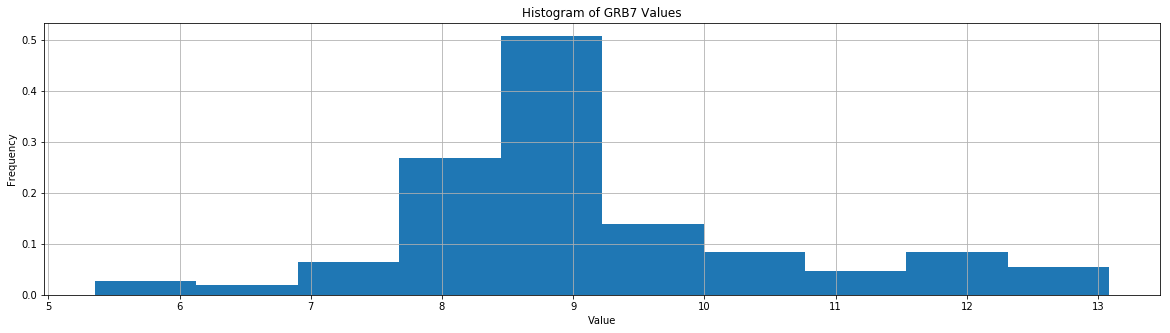

In [131]:
#Now let's do some entropy calculations
#Let's start with our strongest positive correlation, GRB7
import scipy
import scipy.stats as stats

plt.figure(figsize=(20,5))
axes = data_math[7441].hist(density=True)
plt.title('Histogram of GRB7 Values')
plt.xlabel('Value')
plt.ylabel('Frequency')

GRB7 = np.array(data_math[7441])
expression = np.array(data_math[0])

obs = np.array([data_math[0],
                  data_math[7441]])

print(stats.chi2_contingency(obs)[0:3])
#Basic chi-squared test returns a p value of essentially 1, confirming that our GRB7 and expression values
#are highly correlated

H_X_k = stats.entropy(GRB7);
H_Y = stats.entropy(expression);

print(stats.entropy(GRB7))
print(stats.entropy(expression))

#Let's calculate Mutual Information to make finding Conditional Entropy easier
from sklearn.metrics import mutual_info_score

def calc_MI(x, y, bins):
    c_xy = np.histogram2d(x, y, bins)[0]
    mi = mutual_info_score(None, None, contingency=c_xy)
    return mi

I_XY = calc_MI(GRB7, expression, 10);

print('Our Mutual Information I(X_k, Y) is:', calc_MI(GRB7, expression, 10))
#Nonzero, confirming our variables are not independent

#And as I(X,Y) = H(X) − H(X | Y) = H(Y) − H(Y | X)

print('Our H(X | Y) is:', H_X_k - I_XY, 'and our H(Y | X) is', H_Y - I_XY)
#In both cases, conditional entropy is lower than sole entropy, again further
#showing the variables are linked

(114.53518869606896, 0.9361027225791412, 139)
4.936360220347172
3.401197381662155
Our Mutual Information I(X_k, Y) is: 0.16237290804610252
Our H(X | Y) is: 4.773987312301069 and our H(Y | X) is 3.2388244736160523


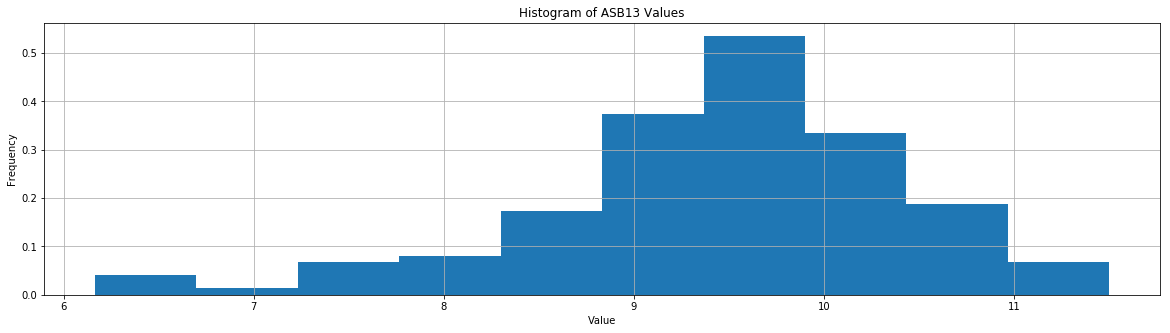

In [132]:
#Now let's do the same with our strongest negative correlation, ASB13

import scipy
import scipy.stats as stats

plt.figure(figsize=(20,5))
axes = data_math[10734].hist(density=True)
plt.title('Histogram of ASB13 Values')
plt.xlabel('Value')
plt.ylabel('Frequency')

ASB13 = np.array(data_math[10734])
expression = np.array(data_math[0])

obs = np.array([data_math[0],
                  data_math[10734]])

print(stats.chi2_contingency(obs)[0:3])
#Basic chi-squared test returns a p value of not quite 1 like GRB7, but still high enough
#to suggest a lack of independence

H_X_k = stats.entropy(ASB13);
H_Y = stats.entropy(expression);

print(stats.entropy(ASB13))
print(stats.entropy(expression))

#Let's calculate Mutual Information to make finding Conditional Entropy easier
from sklearn.metrics import mutual_info_score

def calc_MI(x, y, bins):
    c_xy = np.histogram2d(x, y, bins)[0]
    mi = mutual_info_score(None, None, contingency=c_xy)
    return mi

I_XY = calc_MI(ASB13, expression, 10);

print('Our Mutual Information I(X_k, Y) is:', calc_MI(ASB13, expression, 10))
#Nonzero, although smaller than that of expression and GRB7, confirming our variables are not independent

#And as I(X,Y) = H(X) − H(X | Y) = H(Y) − H(Y | X)

print('Our H(X | Y) is:', H_X_k - I_XY, 'and our H(Y | X) is', H_Y - I_XY)
#In both cases, conditional entropy is lower than sole entropy, again further
#showing the variables are linked

#These have all just been a number of ways to illustrate the same concept, that our expression variable
#is far from independent of many of our gene expression variables. Further analysis could include some further analysis
#within the genese themselves to determine if the genese that are causing higher or lower expression rates
#are linked themselves (could increasing one correlated gene also increase another, creating an amplified)
#effect. Although we have only thoroughly analyzed the most positively and negatively correlated genese, 
#the proof through a number of methods that our expression is in deed not independent of gene expression
#suggests that a machine learning algorithm would be able to have some accuracy in predicting breast cancer
#expression (although the specific algorithm to use would require some further testing.)

In [131]:
#Basic rank-sum hypothesis testing 
import statsmodels.stats.multitest as mt
data_math = data_math.transpose()

from scipy.stats import ranksums

data_math = np.array(data_math);

i = 0;
num_genes = 0;
indices = [];
p_vals = [];
while i < len(data_math):
    x = [];
    y = [];
    for val in range(0, 140):
        if data_math[0, val] == 1:
            x.append(data_math[i, val]);
        else:
            y.append(data_math[i, val]);
    stat, p = ranksums(x, y)  
    p_vals.append(p)
    if p<.05:
        num_genes += 1;
        indices.append(i)
    i += 1;

p_corr = mt.multipletests(p_vals, .05);

boolvals = p_corr[0]

print(num_genes)

print(np.count_nonzero(p_corr[0]))

print(data['Unnamed: 0'][boolvals])


1604
13
0                           0
633                     PSMD3
1752                   STARD3
4865                     PNMT
6473                   PLXNB2
7441                     GRB7
7489                    ERBB2
8247          MIR6884///MED24
8730     LOC102724788///PRODH
9277                    GSDMB
10734                   ASB13
11903                   NUDT6
13083                   PGAP3
Name: Unnamed: 0, dtype: object


In [5]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import roc_curve, auc



nvals = np.arange(start=1, stop=31);
accNN = [];

y = data_math[0].transpose();
x = data_math[1:].transpose();


for i in nvals:
    accbalNN = [];
    
    kf = KFold(n_splits=10, shuffle=True)
    for train_index, test_index in kf.split(x):

        xtrain, xtest = x[train_index], x[test_index]
        ytrain, ytest = y[train_index], y[test_index]

        neigh = KNeighborsClassifier(n_neighbors=i)
        neigh.fit(xtrain, ytrain)

        ypred = neigh.predict(xtest)

        accbalNN.append(balanced_accuracy_score(ytest, ypred));
        
    accNN.append(np.mean(accbalNN));
    

Text(0, 0.5, 'Balanced Accuracy')

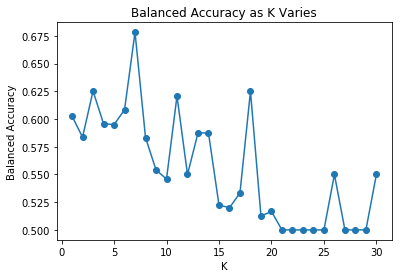

In [6]:
from scipy.interpolate import make_interp_spline

plt.figure()
plt.plot(nvals, accNN, 'o-')
plt.title('Balanced Accuracy as K Varies')
plt.xlabel('K')
plt.ylabel('Balanced Accuracy')

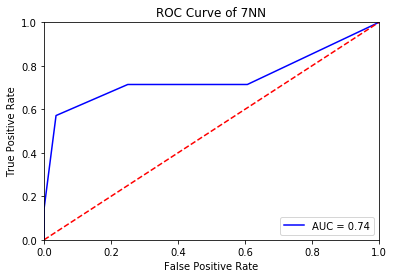

In [55]:
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

y = data_math[0].transpose();
x = data_math[1:].transpose();

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train,y_train)

y_scores = knn.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of 7NN')
plt.show()

In [35]:
nvals = np.arange(start=1, stop=31);
accNN = [];

y = data_math[0].transpose();
x = data_math[1:].transpose();


for j in nvals:
    print(j)
    accbalNN = [];

    y = data_math[0].transpose();
    x = data_math[1:].transpose();
    
    kf = KFold(n_splits=10, shuffle=True)
    for train_index, test_index in kf.split(x):
        
        y = data_math[0].transpose();
        x = data_math[1:].transpose();
        

        xtrain, xtest = x[train_index], x[test_index]
        ytrain, ytest = y[train_index], y[test_index]
        
        
        xtrain = xtrain.transpose();
        xtest = xtest.transpose();
        
        i = 0;
        num_genes = 0;
        indices = [];
        p_vals = [];
        while i < len(xtrain):
            x = [];
            y = [];
            for val in range(len(xtrain[0])):
                if ytrain[val] == 1:
                    x.append(xtrain[i, val]);
                else:
                    y.append(xtrain[i, val]);
            stat, p = ranksums(x, y)  
            p_vals.append(p)
            if p<.05:
                num_genes += 1;
                indices.append(i)
            i += 1;
        
        xtrain = xtrain[indices, :];
        xtest = xtest[indices, :];
        
        xtrain = xtrain.transpose();
        xtest = xtest.transpose();

        neigh = KNeighborsClassifier(n_neighbors=j)
        neigh.fit(xtrain, ytrain)

        ypred = neigh.predict(xtest)

        accbalNN.append(balanced_accuracy_score(ytest, ypred));
        
    
    accNN.append(np.mean(accbalNN));
    

1
2


C:\Users\zdbor\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')


3
4
5
6
7
8
9
10
11
12
13
14
15


C:\Users\zdbor\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')


16


C:\Users\zdbor\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')


17
18
19
20
21
22
23


C:\Users\zdbor\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')


24
25
26
27
28
29
30


Text(0, 0.5, 'Balanced Accuracy')

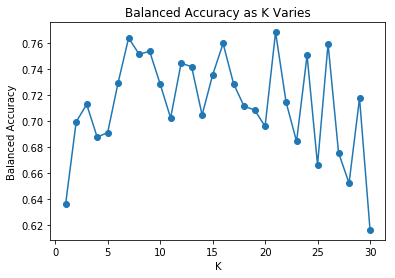

In [37]:
plt.figure()
plt.plot(nvals, accNN, 'o-')
plt.title('Balanced Accuracy as K Varies')
plt.xlabel('K')
plt.ylabel('Balanced Accuracy')

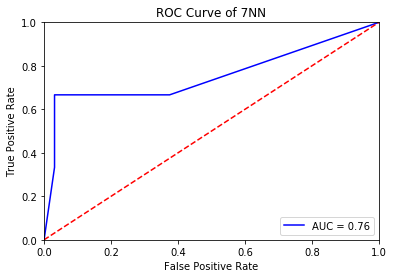

In [60]:
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

y = data_math[0].transpose();
x = data_math[1:].transpose();

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25)


xtrain = xtrain.transpose();
xtest = xtest.transpose();
        
i = 0;
num_genes = 0;
indices = [];
p_vals = [];
while i < len(xtrain):
    x = [];
    y = [];
    for val in range(len(xtrain[0])):
        if ytrain[val] == 1:
            x.append(xtrain[i, val]);
        else:
            y.append(xtrain[i, val]);
    stat, p = ranksums(x, y)  
    p_vals.append(p)
    if p<.05:
        num_genes += 1;
        indices.append(i)
    i += 1;

xtrain = xtrain[indices, :];
xtest = xtest[indices, :];

xtrain = xtrain.transpose();
xtest = xtest.transpose();

knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(xtrain,ytrain)

y_scores = knn.predict_proba(xtest)
fpr, tpr, threshold = roc_curve(ytest, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of 7NN')
plt.show()




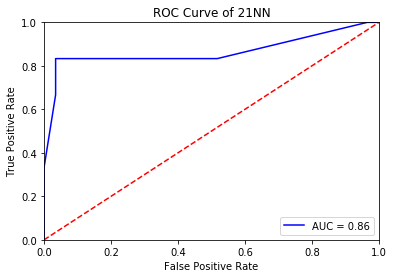

In [63]:
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

y = data_math[0].transpose();
x = data_math[1:].transpose();

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25)


xtrain = xtrain.transpose();
xtest = xtest.transpose();
        
i = 0;
num_genes = 0;
indices = [];
p_vals = [];
while i < len(xtrain):
    x = [];
    y = [];
    for val in range(len(xtrain[0])):
        if ytrain[val] == 1:
            x.append(xtrain[i, val]);
        else:
            y.append(xtrain[i, val]);
    stat, p = ranksums(x, y)  
    p_vals.append(p)
    if p<.05:
        num_genes += 1;
        indices.append(i)
    i += 1;

xtrain = xtrain[indices, :];
xtest = xtest[indices, :];

xtrain = xtrain.transpose();
xtest = xtest.transpose();

knn = KNeighborsClassifier(n_neighbors = 21)
knn.fit(xtrain,ytrain)

y_scores = knn.predict_proba(xtest)
fpr, tpr, threshold = roc_curve(ytest, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of 21NN')
plt.show()


In [68]:
nvals = np.arange(start=1, stop=31);
accNN = [];

y = data_math[0].transpose();
x = data_math[1:].transpose();


for j in nvals:
    print(j)
    accbalNN = [];

    y = data_math[0].transpose();
    x = data_math[1:].transpose();
    
    kf = KFold(n_splits=10, shuffle=True)
    for train_index, test_index in kf.split(x):
        
        y = data_math[0].transpose();
        x = data_math[1:].transpose();
        

        xtrain, xtest = x[train_index], x[test_index]
        ytrain, ytest = y[train_index], y[test_index]
        
        
        xtrain = xtrain.transpose();
        xtest = xtest.transpose();
        
        i = 0;
        num_genes = 0;
        indices = [];
        p_vals = [];
        while i < len(xtrain):
            x = [];
            y = [];
            for val in range(len(xtrain[0])):
                if ytrain[val] == 1:
                    x.append(xtrain[i, val]);
                else:
                    y.append(xtrain[i, val]);
            stat, p = ranksums(x, y)  
            p_vals.append(p)
            if p<.05:
                num_genes += 1;
                indices.append(i)
            i += 1;
        
        p_corr = mt.multipletests(p_vals, .05);
        bool_vals = p_corr[0];

    
        xtrain = xtrain[bool_vals, :];
        xtest = xtest[bool_vals, :];
        
        xtrain = xtrain.transpose();
        xtest = xtest.transpose();

        neigh = KNeighborsClassifier(n_neighbors=j)
        neigh.fit(xtrain, ytrain)

        ypred = neigh.predict(xtest)

        accbalNN.append(balanced_accuracy_score(ytest, ypred));
        
    
    accNN.append(np.mean(accbalNN));
    

1
2
3
4
5
6
7
8
9
10
11
12
13
14


C:\Users\zdbor\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')


15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


Text(0, 0.5, 'Balanced Accuracy')

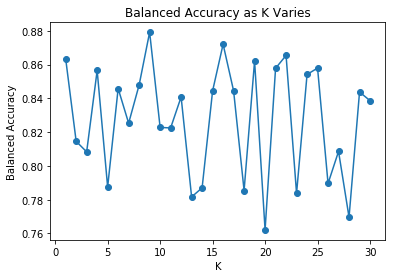

In [69]:
plt.figure()
plt.plot(nvals, accNN, 'o-')
plt.title('Balanced Accuracy as K Varies')
plt.xlabel('K')
plt.ylabel('Balanced Accuracy')

0.8454545454545455


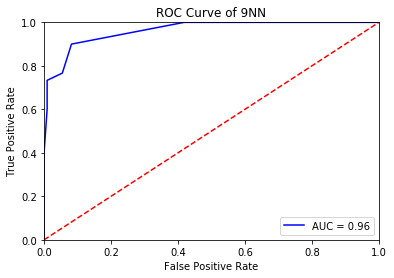

In [99]:
y = data_math[0].transpose();
x = data_math[1:].transpose();

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25)


xtrain = xtrain.transpose();
xtest = xtest.transpose();
        
i = 0;
num_genes = 0;
indices = [];
p_vals = [];
while i < len(xtrain):
    x = [];
    y = [];
    for val in range(len(xtrain[0])):
        if ytrain[val] == 1:
            x.append(xtrain[i, val]);
        else:
            y.append(xtrain[i, val]);
    stat, p = ranksums(x, y)  
    p_vals.append(p)
    if p<.01:
        num_genes += 1;
        indices.append(i)
    i += 1;

p_corr = mt.multipletests(p_vals, .01);
bool_vals = p_corr[0];


xtrain = xtrain[bool_vals, :];
xtest = xtest[bool_vals, :];
xtrain = xtrain.transpose();
xtest = xtest.transpose();

knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(xtrain,ytrain)

y = data_math[0].transpose();
x = data_math[1:].transpose();

x = x.transpose();


x = x[bool_vals, :];


x = x.transpose();

ypred = knn.predict(x)

print(balanced_accuracy_score(y, ypred))



y_scores = knn.predict_proba(x)
fpr, tpr, threshold = roc_curve(y, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of 9NN')
plt.show()




In [75]:
print(1 - np.interp(.8, tpr, fpr))

0.9642857142857143


In [100]:
nvals = np.arange(start=1, stop=31);
accNN = [];

y = data_math[0].transpose();
x = data_math[1:].transpose();


for j in nvals:
    print(j)
    accbalNN = [];

    y = data_math[0].transpose();
    x = data_math[1:].transpose();
    
    kf = KFold(n_splits=10, shuffle=True)
    for train_index, test_index in kf.split(x):
        
        y = data_math[0].transpose();
        x = data_math[1:].transpose();
        

        xtrain, xtest = x[train_index], x[test_index]
        ytrain, ytest = y[train_index], y[test_index]
        
        
        xtrain = xtrain.transpose();
        xtest = xtest.transpose();
        
        i = 0;
        num_genes = 0;
        indices = [];
        p_vals = [];
        while i < len(xtrain):
            x = [];
            y = [];
            for val in range(len(xtrain[0])):
                if ytrain[val] == 1:
                    x.append(xtrain[i, val]);
                else:
                    y.append(xtrain[i, val]);
            stat, p = ranksums(x, y)  
            p_vals.append(p)
            if p<.05:
                num_genes += 1;
                indices.append(i)
            i += 1;
        
        p_corr = mt.multipletests(p_vals, .05);
        bool_vals = p_corr[0];

    
        xtrain = xtrain[bool_vals, :];
        xtest = xtest[bool_vals, :];
        
        xtrain = xtrain.transpose();
        xtest = xtest.transpose();

        neigh = KNeighborsClassifier(n_neighbors=j)
        neigh.fit(xtrain, ytrain)

        ypred = neigh.predict(xtest)

        accbalNN.append(balanced_accuracy_score(ytest, ypred));
        
    
    accNN.append(np.mean(accbalNN));
    

1
2
3
4
5
6
7
8
9
10
11
12


C:\Users\zdbor\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')


13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


Text(0, 0.5, 'Balanced Accuracy')

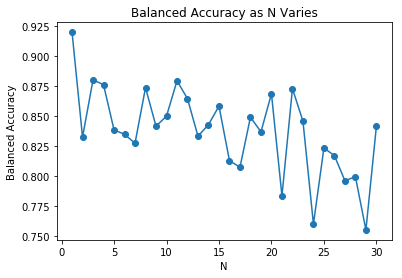

In [101]:
plt.figure()
plt.plot(nvals, accNN, 'o-')
plt.title('Balanced Accuracy as N Varies')
plt.xlabel('N')
plt.ylabel('Balanced Accuracy')

In [102]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier

nvals = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None];
accRF = [];

y = data_math[0].transpose();
x = data_math[1:].transpose();


for j in nvals:
    print(j)
    accbalRF = [];

    y = data_math[0].transpose();
    x = data_math[1:].transpose();
    
    kf = KFold(n_splits=10, shuffle=True)
    for train_index, test_index in kf.split(x):
        
        y = data_math[0].transpose();
        x = data_math[1:].transpose();
        

        xtrain, xtest = x[train_index], x[test_index]
        ytrain, ytest = y[train_index], y[test_index]
        
        
        xtrain = xtrain.transpose();
        xtest = xtest.transpose();
        
        i = 0;
        num_genes = 0;
        indices = [];
        p_vals = [];
        while i < len(xtrain):
            x = [];
            y = [];
            for val in range(len(xtrain[0])):
                if ytrain[val] == 1:
                    x.append(xtrain[i, val]);
                else:
                    y.append(xtrain[i, val]);
            stat, p = ranksums(x, y)  
            p_vals.append(p)
            if p<.05:
                num_genes += 1;
                indices.append(i)
            i += 1;
        
        p_corr = mt.multipletests(p_vals, .05);
        bool_vals = p_corr[0];

    
        xtrain = xtrain[bool_vals, :];
        xtest = xtest[bool_vals, :];
        
        xtrain = xtrain.transpose();
        xtest = xtest.transpose();

        clf = RandomForestClassifier(n_estimators=100, max_depth=j)
        clf.fit(xtrain, ytrain)

        ypred = clf.predict(xtest)

        accbalRF.append(balanced_accuracy_score(ytest, ypred));
        
    
    accRF.append(np.mean(accbalRF));
    

10
20
30
40
50
60
70
80
90
100
None


0.89989898989899


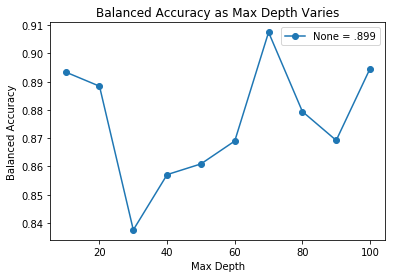

In [108]:
plt.figure()
plt.plot(nvals, accRF, 'o-')
plt.title('Balanced Accuracy as Max Depth Varies')
plt.xlabel('Max Depth')
plt.ylabel('Balanced Accuracy')
plt.legend(['None = .899'])
print(accRF[10])

0.9666666666666667


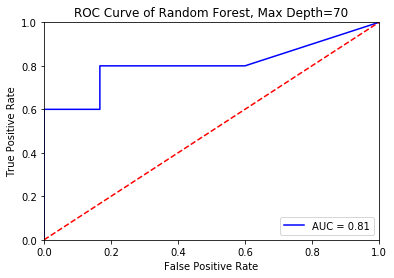

In [124]:
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

y = data_math[0].transpose();
x = data_math[1:].transpose();

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25)


xtrain = xtrain.transpose();
xtest = xtest.transpose();
        
i = 0;
num_genes = 0;
indices = [];
p_vals = [];
while i < len(xtrain):
    x = [];
    y = [];
    for val in range(len(xtrain[0])):
        if ytrain[val] == 1:
            x.append(xtrain[i, val]);
        else:
            y.append(xtrain[i, val]);
    stat, p = ranksums(x, y)  
    p_vals.append(p)
    if p<.05:
        num_genes += 1;
        indices.append(i)
    i += 1;

p_corr = mt.multipletests(p_vals, .05);
bool_vals = p_corr[0];

xtrain = xtrain[bool_vals, :];
xtest = xtest[bool_vals, :];
        
xtrain = xtrain.transpose();
xtest = xtest.transpose();

clf = RandomForestClassifier(n_estimators=100, max_depth=70)
clf.fit(xtrain, ytrain)

y = data_math[0].transpose();
x = data_math[1:].transpose();

x = x.transpose();


x = x[bool_vals, :];


x = x.transpose();




ypred = clf.predict(x)


print(balanced_accuracy_score(y, ypred))

y_scores = clf.predict_proba(xtest)
fpr, tpr, threshold = roc_curve(ytest, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Random Forest, Max Depth=70')
plt.show()


In [120]:
print(1 - np.interp(.8, tpr, fpr))

0.9259259259259259


In [22]:
#Let's train a nearest neighbors classifier on the whole dataset

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score




accNN = [];
accbalNN = [];

kf = KFold(n_splits=10, shuffle=True)
for train_index, test_index in kf.split(x):
    
    y = data_math[0].transpose();
    x = data_math[1:].transpose();
    
    xtrain, xtest = x[train_index], x[test_index]
    ytrain, ytest = y[train_index], y[test_index]
    
    neigh = KNeighborsClassifier(n_neighbors=5)
    neigh.fit(xtrain, ytrain)

    ypred = neigh.predict(xtest)

    i = 0;
    acc_val_NN = 0;
    while i < len(ypred):
        if ypred[i] == ytest[i]:
            acc_val_NN += 1;
        i += 1;

    accNN.append(acc_val_NN / len(ypred));
    
    accbalNN.append(balanced_accuracy_score(ytest, ypred));

print('Our mean accuracy for NN is:', np.mean(accNN))
print('Our mean balanced accuracy for NN is:', np.mean(accbalNN))

accRF = [];
accbalRF = [];

kf = KFold(n_splits=10, shuffle=True)
for train_index, test_index in kf.split(x):
    xtrain, xtest = x[train_index], x[test_index]
    ytrain, ytest = y[train_index], y[test_index]
    
    clf = RandomForestClassifier()
    clf.fit(xtrain, ytrain)


    ypred = clf.predict(xtest)

    i = 0;
    acc_val_RF = 0;
    while i < len(ypred):
        if ypred[i] == ytest[i]:
            acc_val_RF += 1;
        i += 1;

    accRF.append(acc_val_RF / len(ypred));
    
    accbalRF.append(balanced_accuracy_score(ytest, ypred));

print('Our mean accuracy for RF is:', np.mean(accRF))
print('Our mean balanced accuracy for RF is:', np.mean(accbalRF))

accLR = [];
accbalLR = [];

kf = KFold(n_splits=10, shuffle=True)
for train_index, test_index in kf.split(x):
    xtrain, xtest = x[train_index], x[test_index]
    ytrain, ytest = y[train_index], y[test_index]
    
    model = LogisticRegression()
    model.fit(xtrain, ytrain)

    ypred = model.predict(xtest)

    i = 0;
    acc_val_LR = 0;
    while i < len(ypred):
        if ypred[i] == ytest[i]:
            acc_val_LR += 1;
        i += 1;

    accLR.append(acc_val_LR / len(ypred));
    
    accbalLR.append(balanced_accuracy_score(ytest, ypred));
    

print('Our mean accuracy for LR is:', np.mean(accLR))
print('Our mean balanced accuracy for LR is:', np.mean(accbalLR))







Our mean accuracy for NN is: 0.8428571428571429
Our mean balanced accuracy for NN is: 0.6458333333333333


C:\Users\zdbor\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\zdbor\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\zdbor\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\zdbor\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\zdbor\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

Our mean accuracy for RF is: 0.8
Our mean balanced accuracy for RF is: 0.5620629370629371


C:\Users\zdbor\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\zdbor\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\zdbor\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\zdbor\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\zdbor\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Our mean accuracy for LR is: 0.8785714285714284
Our mean balanced accuracy for LR is: 0.7108333333333333


In [24]:
from sklearn.metrics import roc_curve, auc

accNN = [];
accbalNN = [];

kf = KFold(n_splits=10, shuffle=True)
for train_index, test_index in kf.split(x):
    i = 1;
    num_genes = 0;
    indices = [];
    p_vals = [];
    while i < len(data_math):
        x = [];
        y = [];
        for val in range(0, 140):
            if data_math[0, val] == 1:
                x.append(data_math[i, val]);
            else:
                y.append(data_math[i, val]);
        stat, p = ranksums(x, y)  
        p_vals.append(p)
        if p<.05:
            num_genes += 1;
            indices.append(i)
        i += 1;
    
    
    indices_up = np.insert(indices, 0, 0, axis=0)
    data_math_corr = data_math[indices_up, :]
    
    y = data_math_corr[0].transpose();
    x = data_math_corr[1:].transpose();

    
    xtrain, xtest = x[train_index], x[test_index]
    ytrain, ytest = y[train_index], y[test_index]
    
    neigh = KNeighborsClassifier(n_neighbors=5)
    neigh.fit(xtrain, ytrain)

    ypred = neigh.predict(xtest)

    i = 0;
    acc_val = 0;
    fp_val = 0;
    while i < len(ypred):
        if ypred[i] == ytest[i]:
            acc_val += 1;
        elif ypred[i] == 1 and ytest[i] == 0:
            fp_val += 1;
        i += 1;

    accNN.append(acc_val_NN / len(ypred));
    
    accbalNN.append(balanced_accuracy_score(ytest, ypred));

print('Our mean accuracy for NN is:', np.mean(accNN))
print('Our mean balanced accuracy for NN is:', np.mean(accbalNN))

accRF = [];
accbalRF = [];
fpRF = [];

kf = KFold(n_splits=10, shuffle=True)
for train_index, test_index in kf.split(x):
    i = 1;
    num_genes = 0;
    indices = [];
    p_vals = [];
    while i < len(data_math):
        x = [];
        y = [];
        for val in range(0, 140):
            if data_math[0, val] == 1:
                x.append(data_math[i, val]);
            else:
                y.append(data_math[i, val]);
        stat, p = ranksums(x, y)  
        p_vals.append(p)
        if p<.05:
            num_genes += 1;
            indices.append(i)
        i += 1;
    
    
    indices_up = np.insert(indices, 0, 0, axis=0)
    data_math_corr = data_math[indices_up, :]
    
    y = data_math_corr[0].transpose();
    x = data_math_corr[1:].transpose();

    xtrain, xtest = x[train_index], x[test_index]
    ytrain, ytest = y[train_index], y[test_index]
    
    clf = RandomForestClassifier()
    clf.fit(xtrain, ytrain)


    ypred = clf.predict(xtest)

    i = 0;
    acc_val_RF = 0;
    fp_val_RF = 0;
    while i < len(ypred):
        if ypred[i] == ytest[i]:
            acc_val_RF += 1;
        elif ypred[i] == 1 and ytest[i] == 0:
            fp_val_RF += 1;
        i += 1;

    accRF.append(acc_val_RF / len(ypred));
    fpRF.append(fp_val_RF / len(ypred));
    
    accbalRF.append(balanced_accuracy_score(ytest, ypred));

print('Our mean accuracy for RF is:', np.mean(accRF))
print('Our mean balanced accuracy for RF is:', np.mean(accbalRF))

accLR = [];
accbalLR = []
fpr = [];
tpr = [];

kf = KFold(n_splits=10, shuffle=True)
for train_index, test_index in kf.split(x):
    i = 1;
    num_genes = 0;
    indices = [];
    p_vals = [];
    while i < len(data_math):
        x = [];
        y = [];
        for val in range(0, 140):
            if data_math[0, val] == 1:
                x.append(data_math[i, val]);
            else:
                y.append(data_math[i, val]);
        stat, p = ranksums(x, y)  
        p_vals.append(p)
        if p<.05:
            num_genes += 1;
            indices.append(i)
        i += 1;
    
    
    indices_up = np.insert(indices, 0, 0, axis=0)
    data_math_corr = data_math[indices_up, :]
    
    y = data_math_corr[0].transpose();
    x = data_math_corr[1:].transpose();
    xtrain, xtest = x[train_index], x[test_index]
    ytrain, ytest = y[train_index], y[test_index]
    
    model = LogisticRegression()
    model.fit(xtrain, ytrain)

    ypred = model.predict(xtest)

    i = 0;
    acc_val_LR = 0;
    while i < len(ypred):
        if ypred[i] == ytest[i]:
            acc_val_LR += 1;
        i += 1;

    accLR.append(acc_val_LR / len(ypred));
    
    accbalLR.append(balanced_accuracy_score(ytest, ypred));


print('Our mean accuracy for LR is:', np.mean(accLR))
print('Our mean balanced accuracy for LR is:', np.mean(accbalLR))


Our mean accuracy for NN is: 0.8571428571428571
Our mean balanced accuracy for NN is: 0.8225000000000001


C:\Users\zdbor\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\zdbor\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\zdbor\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\zdbor\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\zdbor\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

Our mean accuracy for RF is: 0.8428571428571429
Our mean balanced accuracy for RF is: 0.7022402597402598


C:\Users\zdbor\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\zdbor\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\zdbor\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\zdbor\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\zdbor\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Our mean accuracy for LR is: 0.9285714285714286
Our mean balanced accuracy for LR is: 0.845


C:\Users\zdbor\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [125]:
accNN = [];
accbalNN = [];
fpnn = [];

kf = KFold(n_splits=10, shuffle=True)
for train_index, test_index in kf.split(x):
    i = 1;
    num_genes = 0;
    indices = [];
    p_vals = [];
    while i < len(data_math):
        x = [];
        y = [];
        for val in range(0, 140):
            if data_math[0, val] == 1:
                x.append(data_math[i, val]);
            else:
                y.append(data_math[i, val]);
        stat, p = ranksums(x, y)  
        p_vals.append(p)
        if p<.05:
            num_genes += 1;
            indices.append(i)
        i += 1;

    p_corr = mt.multipletests(p_vals, .05);
    bool_vals = p_corr[0];
    
    bool_vals = np.insert(bool_vals,0, True);
    data_math_corr = data_math[bool_vals, :]



    y = data_math_corr[0].transpose();
    x = data_math_corr[1:].transpose();

    xtrain, xtest = x[train_index], x[test_index]
    ytrain, ytest = y[train_index], y[test_index]
    
    neigh = KNeighborsClassifier(n_neighbors=5)
    neigh.fit(xtrain, ytrain)

    ypred = neigh.predict(xtest)

    i = 0;
    acc_val = 0;
    fp_val = 0;
    while i < len(ypred):
        if ypred[i] == ytest[i]:
            acc_val += 1;
        elif ypred[i] == 1 and ytest[i] == 0:
            fp_val += 1;
        i += 1;

    accNN.append(acc_val / len(ypred));
    fpnn.append(fp_val / len(ypred))
    
    accbalNN.append(balanced_accuracy_score(ytest, ypred));

print('Our mean accuracy for NN is:', np.mean(accNN))
print('Our mean balanced accuracy for NN is:', np.mean(accbalNN))

accRF = [];
accbalRF = [];
fpRF = [];

kf = KFold(n_splits=10, shuffle=True)
for train_index, test_index in kf.split(x):
    i = 1;
    num_genes = 0;
    indices = [];
    p_vals = [];
    while i < len(data_math):
        x = [];
        y = [];
        for val in range(0, 140):
            if data_math[0, val] == 1:
                x.append(data_math[i, val]);
            else:
                y.append(data_math[i, val]);
        stat, p = ranksums(x, y)  
        p_vals.append(p)
        if p<.05:
            num_genes += 1;
            indices.append(i)
        i += 1;

    p_corr = mt.multipletests(p_vals, .05);
    bool_vals = p_corr[0];
    
    bool_vals = np.insert(bool_vals,0, True);
    data_math_corr = data_math[bool_vals, :]



    y = data_math_corr[0].transpose();
    x = data_math_corr[1:].transpose();

    xtrain, xtest = x[train_index], x[test_index]
    ytrain, ytest = y[train_index], y[test_index]
    
    clf = RandomForestClassifier(n_estimators=100, max_depth=70)
    clf.fit(xtrain, ytrain)


    ypred = clf.predict(xtest)

    i = 0;
    acc_val_RF = 0;
    fp_val_RF = 0;
    while i < len(ypred):
        if ypred[i] == ytest[i]:
            acc_val_RF += 1;
        elif ypred[i] == 1 and ytest[i] == 0:
            fp_val_RF += 1;
        i += 1;

    accRF.append(acc_val_RF / len(ypred));
    fpRF.append(fp_val_RF / len(ypred));
    
    accbalRF.append(balanced_accuracy_score(ytest, ypred));

print('Our mean accuracy for RF is:', np.mean(accRF))
print('Our mean balanced accuracy for RF is:', np.mean(accbalRF))


accLR = [];
accbalLR  = [];
fpr = [];
tpr = [];

kf = KFold(n_splits=10, shuffle=True)
for train_index, test_index in kf.split(x):
    i = 1;
    num_genes = 0;
    indices = [];
    p_vals = [];
    while i < len(data_math):
        x = [];
        y = [];
        for val in range(0, 140):
            if data_math[0, val] == 1:
                x.append(data_math[i, val]);
            else:
                y.append(data_math[i, val]);
        stat, p = ranksums(x, y)  
        p_vals.append(p)
        if p<.05:
            num_genes += 1;
            indices.append(i)
        i += 1;

    p_corr = mt.multipletests(p_vals, .05);
    bool_vals = p_corr[0];
    
    bool_vals = np.insert(bool_vals,0, True);
    data_math_corr = data_math[bool_vals, :]



    y = data_math_corr[0].transpose();
    x = data_math_corr[1:].transpose();

    xtrain, xtest = x[train_index], x[test_index]
    ytrain, ytest = y[train_index], y[test_index]
    
    model = LogisticRegression()
    model.fit(xtrain, ytrain)

    ypred = model.predict(xtest)

    i = 0;
    acc_val_LR = 0;
    while i < len(ypred):
        if ypred[i] == ytest[i]:
            acc_val_LR += 1;
        i += 1;

    accLR.append(acc_val_LR / len(ypred));

    accbalLR.append(balanced_accuracy_score(ytest, ypred));

print('Our mean accuracy for LR is:', np.mean(accLR))
print('Our mean balanced accuracy for LR is:', np.mean(accbalLR))



KeyboardInterrupt: 

0.07884615384615386
